# 全国新型コロナウイルスデータ



## jsonデータを読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.rcParams['font.family'] = 'AppleGothic'

pcr = pd.read_csv('./PCR.csv')
data = pd.read_csv('./COVID-19.csv')
data_pcr = pd.merge(pcr, data, right_on='確定日',left_on='年月日')
data.head()

,通し,厚労省NO,無症状病原体保有者,国内,チャーター便,年代,性別,確定日,発症日,受診都道府県,...,居住都道府県コード,更新日時,Field2,Field4,Field5,Field6,Field7,Field8,Field9,Field10
0,1,1,NaN,A-1,NaN,30,男性,1/15/2020,1/3/2020,神奈川県,...,14.0,4/12/2020 17:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,A-2,NaN,40,男性,1/24/2020,1/14/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,A-3,NaN,30,女性,1/25/2020,1/21/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,A-4,NaN,40,男性,1/26/2020,1/23/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,A-5,NaN,40,男性,1/28/2020,1/22/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 51 columns):
通し                  7095 non-null int64
厚労省NO               3427 non-null object
無症状病原体保有者           369 non-null object
国内                  302 non-null object
チャーター便              11 non-null object
年代                  7095 non-null object
性別                  7095 non-null object
確定日                 7095 non-null object
発症日                 3980 non-null object
受診都道府県              7095 non-null object
居住都道府県              7095 non-null object
居住管内                113 non-null object
居住市区町村              4005 non-null object
キー                  7095 non-null object
発表                  7095 non-null object
都道府県内症例番号           5864 non-null object
市町村内症例番号            1681 non-null object
ステータス               131 non-null object
備考                  1047 non-null object
ソース                 2881 non-null object
ソース2                4445 non-null object
ソース3                1385 non-null objec

## 症状別累計人数

In [3]:
total = int(data["累計"].iloc[-1])
d = int(data["死者合計"].dropna().iloc[-1])
di = int(data["退院数累計"].dropna().iloc[-1])
print(data["確定日"].iloc[-1],"現在データ")
print('全国の新型コロナウイルス感染者はトータル:',total,'死者合計:',d,'累計退院者数:',di)
print('死亡確率：{}%'.format((d/total)*100),'退院率：{}%'.format((di/total)*100))

4/12/2020 現在データ
全国の新型コロナウイルス感染者はトータル: 7095 死者合計: 94 累計退院者数: 762
死亡確率：1.3248766737138828% 退院率：10.739957716701904%


## 日別PCR検査数
厚生労働省の発表資料より

PCR検査数は毎日更新ではありません。

厚生労働省が更新するたびに多少過去の数値が変更されたりしています。

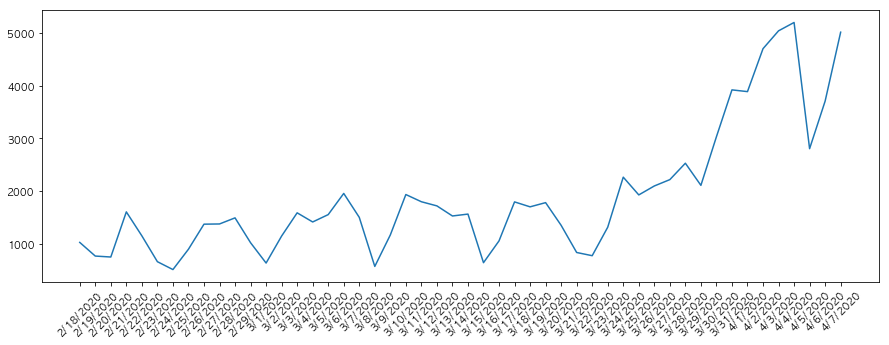

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pcr['年月日'],pcr['数'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

## 累計PCR検査数

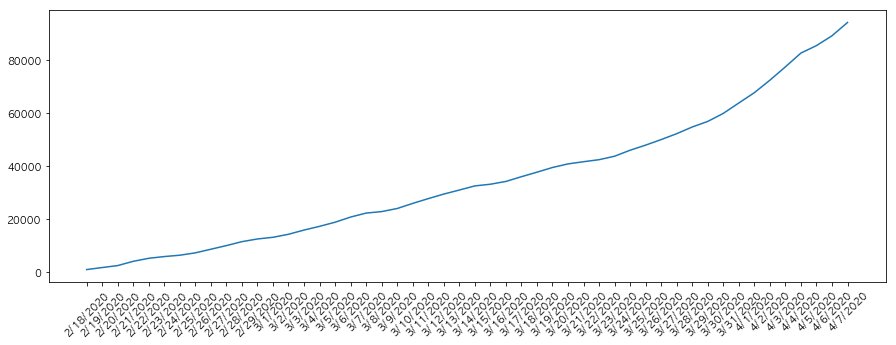

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pcr['年月日'],pcr['PCR累計'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

In [6]:
data = data.convert_objects(convert_numeric=True)
data_day = data.dropna(subset=['累計'])
data_day.loc[:,['累計','確定日']]

/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,累計,確定日
0,1.0,1/15/2020
1,2.0,1/24/2020
2,3.0,1/25/2020
3,4.0,1/26/2020
6,7.0,1/28/2020
7,8.0,1/29/2020
13,14.0,1/30/2020
15,16.0,1/31/2020
18,19.0,2/1/2020
22,23.0,2/4/2020


## 日別感染者累計

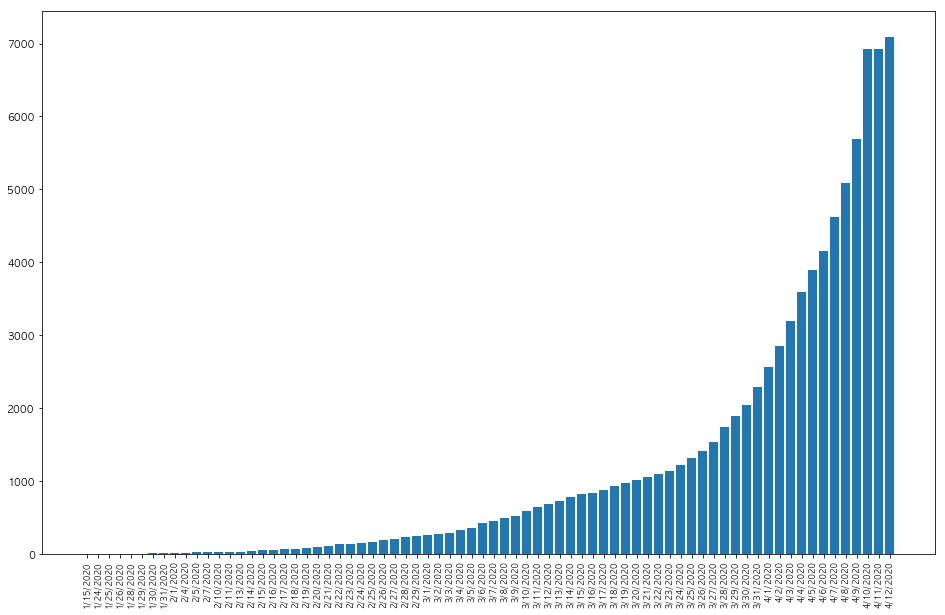

In [7]:
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(data_day['確定日'],data_day['累計'])

labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=8);


## 死亡者推移

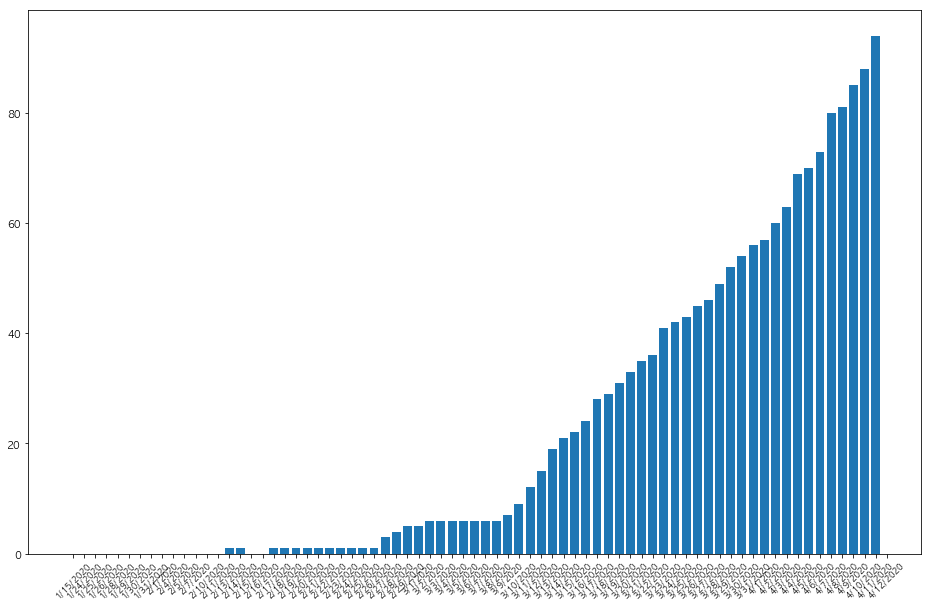

In [8]:
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(data['確定日'],data["死者合計"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8);

## 年代別感染者数割合

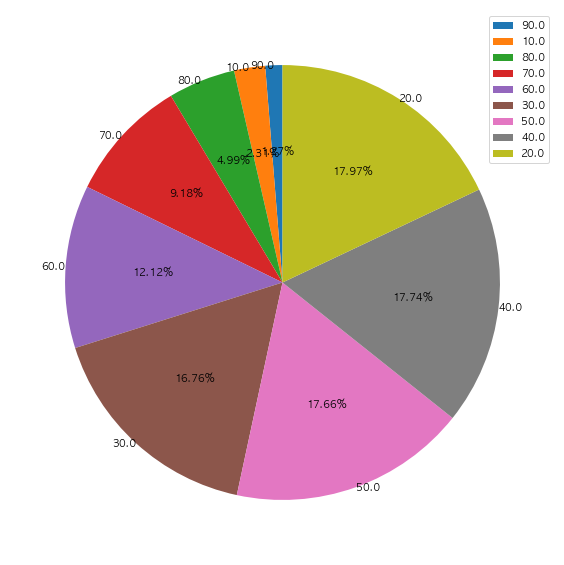

In [9]:
x = data['年代'].value_counts(ascending=True)
label_index = data['年代'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

## 性別感染者数割合

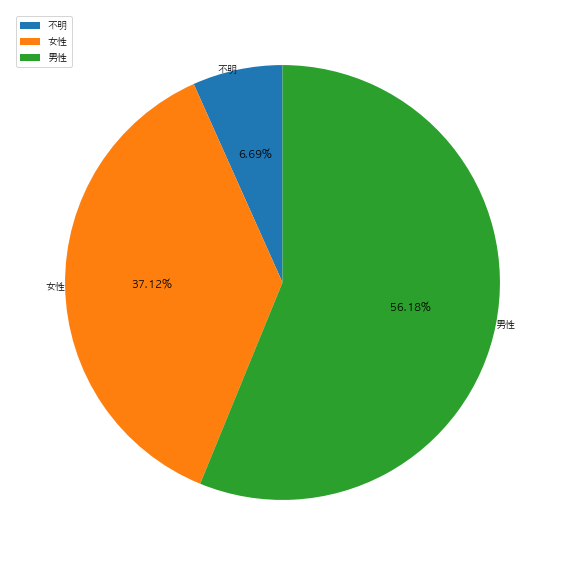

In [10]:
x = data['性別'].value_counts(ascending=True)
label_index = data['性別'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

### 県別累計データ

In [11]:
grouped = data['人数'].groupby(data['居住都道府県'])
total_pref = grouped.sum()
total_pref = total_pref.sort_values(ascending=False) 
total_pref = pd.DataFrame(total_pref)
total_pref

,人数
居住都道府県,
東京都,2090
大阪府,766
神奈川県,527
千葉県,407
埼玉県,369
愛知県,351
兵庫県,345
福岡県,340
北海道,251


In [12]:
location_data = pd.read_csv('./location.csv')
location_data.head()

,都道府県名,緯度,経度
0,北海道,43.06417,141.34694
1,青森県,40.82444,140.74000
2,岩手県,39.70361,141.15250
3,宮城県,38.26889,140.87194
4,秋田県,39.71861,140.10250


### locationデータと感染者数をマージ

In [13]:
pref_data = pd.merge(total_pref, location_data, left_on='居住都道府県', right_on='都道府県名', how='outer')
pref_data['人数'] = pref_data['人数'].fillna(0)
pref_data = pref_data.dropna(subset=['都道府県名'])
pref_data

,人数,都道府県名,緯度,経度
0,2090.0,東京都,35.68944,139.69167
1,766.0,大阪府,34.68639,135.52000
2,527.0,神奈川県,35.44778,139.64250
3,407.0,千葉県,35.60472,140.12333
4,369.0,埼玉県,35.85694,139.64889
5,351.0,愛知県,35.18028,136.90667
6,345.0,兵庫県,34.69139,135.18306
7,340.0,福岡県,33.60639,130.41806
8,251.0,北海道,43.06417,141.34694
9,180.0,京都府,35.02139,135.75556


In [14]:
pref_data_dic = pref_data.to_dict(orient='index')
states = tuple(pref_data_dic.values())

## 県別感染者数Map表示
Map表示はGitHubではできませんので、次のリンクから確認ください。

[県別感染者数Map](https://haidoro.github.io/covid_japan/)

In [15]:
import folium
from folium.plugins import HeatMap

map_ = folium.Map(location=[35.684479, 139.747977], zoom_start=5)


# 円の大きさをわかりやすくするための重み
WEIGHT = 0.01


for state in states:
    folium.CircleMarker(
            [state['緯度'], state['経度']],
            radius=(state['人数'] + WEIGHT)*0.1,
            popup=state['都道府県名'],
            color='#3186cc',
            fill_color='#3186cc',
    ).add_to(map_)


map_.save('index.html')
map_
